In [45]:
import cufflinks as cf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [3]:
cd data

C:\Users\mery-\Desktop\Development\machine-learning-with-python\data


In [8]:
titanic_training = pd.read_csv("train.csv")
titanic_training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_test = pd.read_csv("test.csv")
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


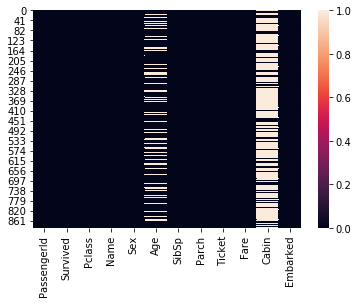

In [11]:
sns.heatmap(titanic_training.isnull()) 
# White color means that the value is null

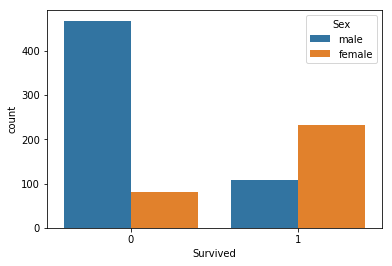

In [13]:
sns.countplot(x='Survived', data=titanic_training, hue="Sex")

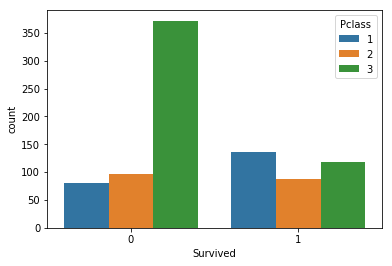

In [14]:
sns.countplot(x='Survived', data=titanic_training, hue="Pclass")

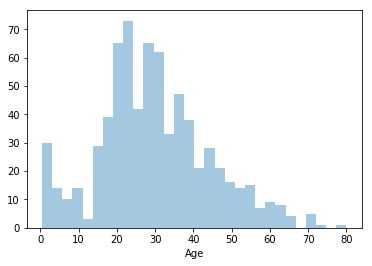

In [16]:
sns.distplot(titanic_training["Age"].dropna(), kde=False, bins=30)

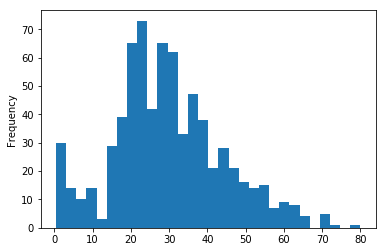

In [17]:
titanic_training["Age"].plot.hist(bins=30)

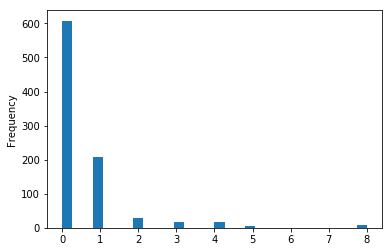

In [18]:
titanic_training["SibSp"].plot.hist(bins=30)

In [20]:
cf.go_offline()

titanic_training["Fare"].iplot(kind="hist", bins=40)

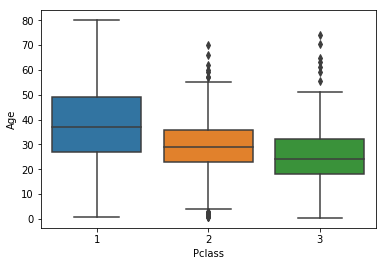

In [21]:
sns.boxplot(x="Pclass", y="Age", data=titanic_training)

In [22]:
def mean_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

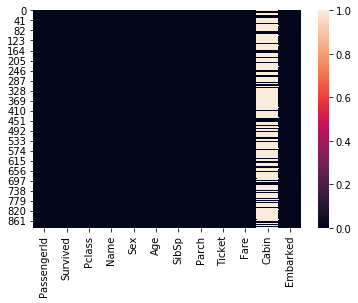

In [24]:
titanic_training["Age"] = titanic_training[["Age", "Pclass"]].apply(mean_age, axis=1)

sns.heatmap(titanic_training.isnull()) 

In [27]:
titanic_training.drop("Cabin", axis=1, inplace=True)
sns.heatmap(titanic_training.isnull()) 

KeyError: "['Cabin'] not found in axis"

In [30]:
titanic_training.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
titanic_training.drop(["Name", "Ticket", "PassengerId"], 
                      axis=1,
                      inplace=True)
titanic_training.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
sex = pd.get_dummies(titanic_training["Sex"], drop_first=True)
titanic_training = pd.concat([titanic_training, sex], axis=1)
titanic_training.drop("Sex",  axis=1, inplace=True)
titanic_training.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,male
0,0,3,22.0,1,0,7.2500,S,1,1
1,1,1,38.0,1,0,71.2833,C,0,0
2,1,3,26.0,0,0,7.9250,S,0,0
3,1,1,35.0,1,0,53.1000,S,0,0
4,0,3,35.0,0,0,8.0500,S,1,1


In [38]:
embarked = pd.get_dummies(titanic_training["Embarked"], drop_first=True)
titanic_training = pd.concat([titanic_training, embarked], axis=1)
titanic_training.drop("Embarked", axis=1, inplace=True)
titanic_training.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,male,Q,S
0,0,3,22.0,1,0,7.2500,1,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [44]:
y = titanic_training["Survived"]
x = titanic_training.drop("Survived", axis=1)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [47]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\users\mery-\desktop\development\machine-learning-with-python\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
predictions = model.predict(x_test)
predictions

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0], dtype=int64)

In [52]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.75      0.72      0.73       103

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.80      0.80      0.80       268



In [54]:
metrics.confusion_matrix(y_test, predictions)

array([[140,  25],
       [ 29,  74]], dtype=int64)